# Decision Tree Classifier
supervised machine learning algorithm used for classification tasks. It works by splitting the dataset into smaller and smaller subsets based on feature values, forming a tree-like structure of decisions. Each internal node represents a decision rule (based on a feature), each branch represents an outcome of that decision, and each leaf node represents a final class (prediction).

In [5]:
!pip install pandas scikit-learn matplotlib graphviz

  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd

In [26]:
dataset=pd.read_csv('Iris.csv')
dataset.drop(columns=['Id'], inplace=True)

In [27]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##### Checking Null Values in each colum

In [28]:
print(dataset.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


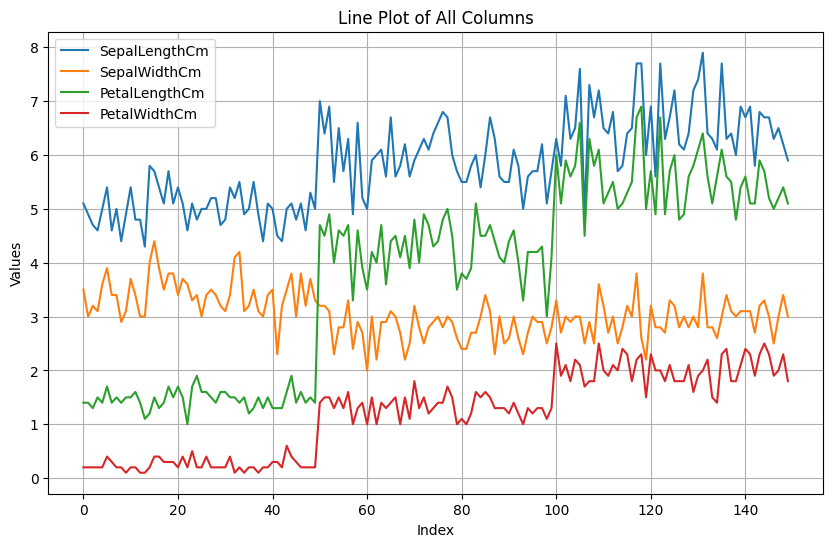

In [29]:
import matplotlib.pyplot as plt

dataset.plot(kind='line', figsize=(10,6))

plt.title("Line Plot of All Columns")
plt.xlabel("Index")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [9]:
# Label Enoding\
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Species'] = le.fit_transform(dataset['Species'])
X = dataset.drop(columns=['Id','Species'])
y= dataset['Species']


#### Spliting into Training and Testing Dataset 
It will be split via 80/20 rule 

80/20 rule means 80% of data will be used to train model and 
20% will be used to test

In [10]:
#### Spliting into Training and Testing Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Model Configuration and Training 

In [22]:
# Step 4: Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Step 5: Train the model
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Gini is the impurity 
The Less the impurity the more accurate split 

max_depth tell how deep tree can be in depth 

random_state is to make the randomness predictable repeatable
it is the seed of the random ness start

#### Take Prediction and Get Accuracy Score

In [12]:

# Step 6: Make predictions
y_pred = clf.predict(X_test)

# Step 7: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


##### Ploting the Tree which model has ben trained

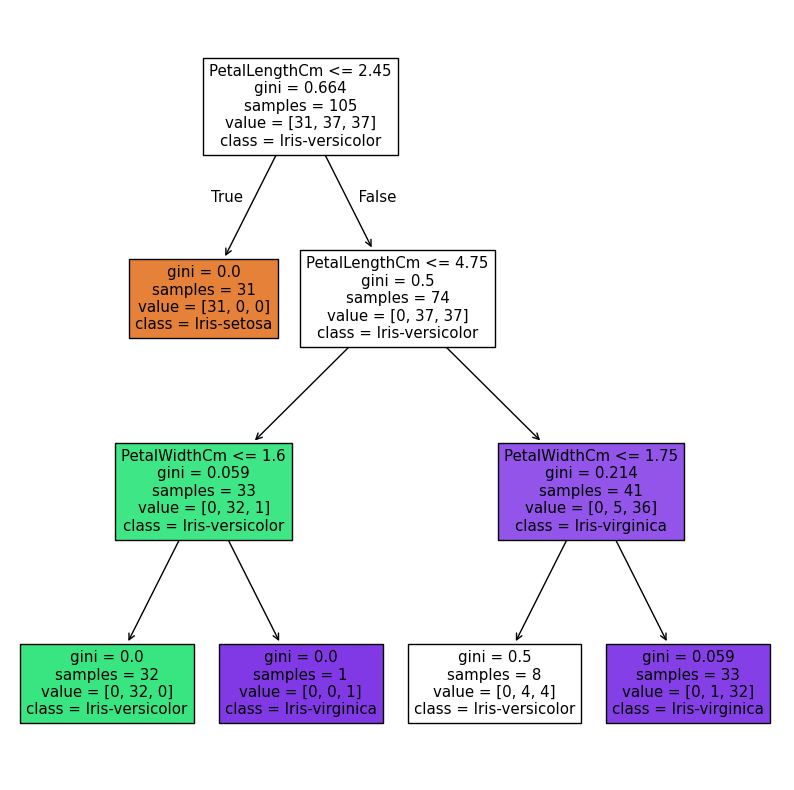

In [31]:

# Step 8: (Optional) Visualize tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

In [33]:
# Take Predictuion on Single Data Point
# Sepal Length, Sepal Width, Petal Length, Petal Width
single_data = [[5.1, 3.5, 3, 0.2]]
predicted_class = clf.predict(single_data)
print("Predicted class for single data point:", le.inverse_transform(predicted_class))

Predicted class for single data point: ['Iris-versicolor']


c:\Users\786\Desktop\Sessions\MachineLearning & DeepLearning\04-Decision-Tree-Classifier\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


c:\Users\786\Desktop\Sessions\MachineLearning & DeepLearning\04-Decision-Tree-Classifier\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\786\Desktop\Sessions\MachineLearning & DeepLearning\04-Decision-Tree-Classifier\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\786\Desktop\Sessions\MachineLearning & DeepLearning\04-Decision-Tree-Classifier\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted class: ['Iris-versicolor']
Node 0: PetalLengthCm <= 2.45 | Your value = 3
Node 2: PetalLengthCm <= 4.75 | Your value = 3
Node 3: PetalWidthCm <= 1.60 | Your value = 0.2
--> Reached leaf node 4


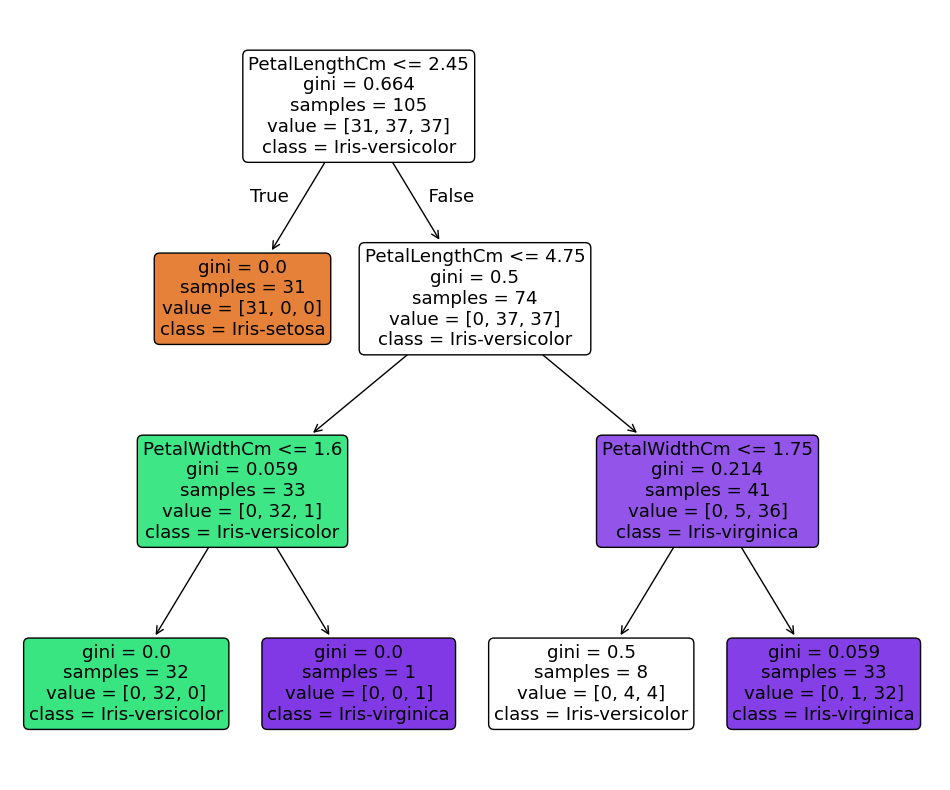

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

# Example input
single_data = [[5.1, 3.5, 3, 0.2]]
predicted_class = clf.predict(single_data)[0]

print("Predicted class:", le.inverse_transform([predicted_class]))

# Get the path taken by this single data point
node_indicator = clf.decision_path(single_data)
leaf_id = clf.apply(single_data)

# Step-by-step path explanation
for node_id in node_indicator.indices:
    if leaf_id[0] == node_id:
        print(f"--> Reached leaf node {node_id}")
    else:
        feature = clf.tree_.feature[node_id]
        threshold = clf.tree_.threshold[node_id]
        print(f"Node {node_id}: {X.columns[feature]} <= {threshold:.2f} | "
              f"Your value = {single_data[0][feature]}")
        
# Plot full tree (not highlighted, but full picture)
plt.figure(figsize=(12, 10))
tree.plot_tree(clf, feature_names=X.columns,
               class_names=le.classes_,
               filled=True, rounded=True)
plt.show()


#### Feature Importance Plot

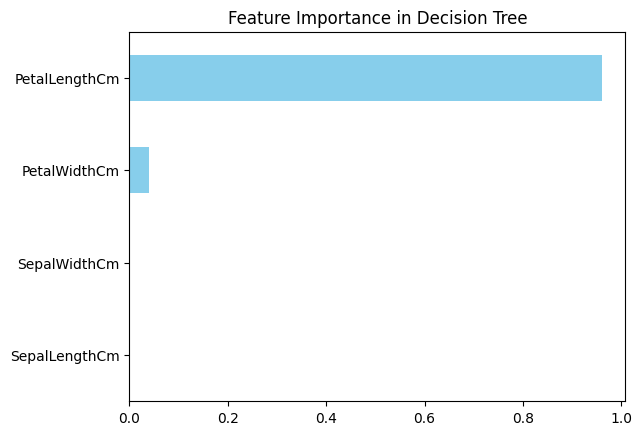

In [18]:
import pandas as pd

# Feature importance
feat_importance = pd.Series(clf.feature_importances_, index=X.columns)

# Plot
feat_importance.sort_values().plot(kind='barh', color="skyblue")
plt.title("Feature Importance in Decision Tree")
plt.show()


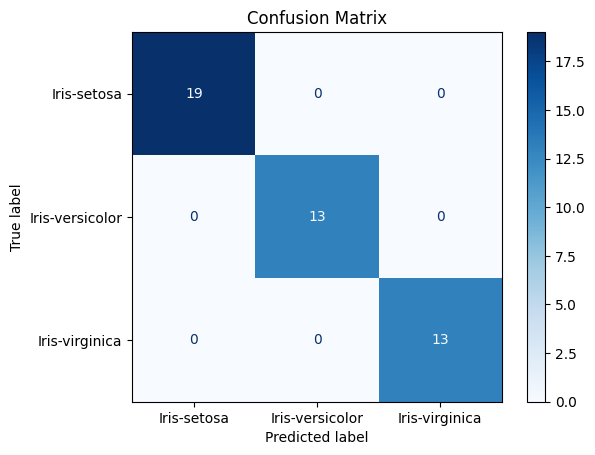

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=le.classes_,
                                        cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
